# 📊 Capstone Project - Marketing Campaign Analytics with IBM Granite (WatsonX)

Notebook ini dibuat untuk menganalisis data marketing campaign. Analisis dilakukan dengan Python untuk EDA dan IBM WatsonX Granite model untuk AI tasks (sentiment analysis & classification).

## 1. Setup Environment

In [ ]:
!pip install pandas matplotlib seaborn scikit-learn ibm_watsonx_ai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.6/139.6 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 47.4 MB/s eta 0:00:00
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.14.3-py3-none-any.whl size=77232 sha256=a38ea5448ebb12d70b9b8515439d4d5a9231674a0632ecfb712b55b80e13cbc2
  Stored in directory: /root/.cache/pip/wheels/cc/2f/6f/125918ad46d280d3bea58edf99f0757888ef6e7999db4b73b7
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.14.3-py3-none-any.whl size=662101 sha256=d6d060d7939b5fce88e075371b6708bde4a7dfeb4decd733bceb3b02ebc86f7d
  Stored in directory: /root/.cache/pip/wheels/f1/53/13/7c8fdeebdb847995d8ef349b4f695c595d8d31b30ae2a07ea2
  Created whe

## 2. Load Dataset

In [ ]:
import pandas as pd
df = pd.read_csv('/content/marketing_dataset_upload.csv')  # upload file dari lokal ke Colab sebelum run
df.head()

,Customer_ID,Age,Gender,Channel,Budget_Spent,Clicks,Conversions,Email_Open_Rate,Customer_Review
0,CUST_0001,20,Female,Facebook Ads,761,499,0,0.94,"Tidak puas, barang rusak saat diterima."
1,CUST_0002,46,Male,Instagram Ads,286,32,0,0.25,"Tidak puas, barang rusak saat diterima."
2,CUST_0003,52,Male,Facebook Ads,586,109,1,0.67,Harga cukup mahal dibanding kompetitor.
3,CUST_0004,56,Male,Instagram Ads,926,218,1,0.88,Harga sepadan dengan kualitas yang didapat.
4,CUST_0005,35,Male,Google Ads,157,409,0,0.07,"Sangat direkomendasikan, pengiriman cepat."


In [ ]:
print(df.columns)

Index(['Customer_ID', 'Age', 'Gender', 'Channel', 'Budget_Spent', 'Clicks',
       'Conversions', 'Email_Open_Rate', 'Customer_Review'],
      dtype='object')


In [ ]:
df = df.dropna()


## 3. Exploratory Data Analysis (EDA)

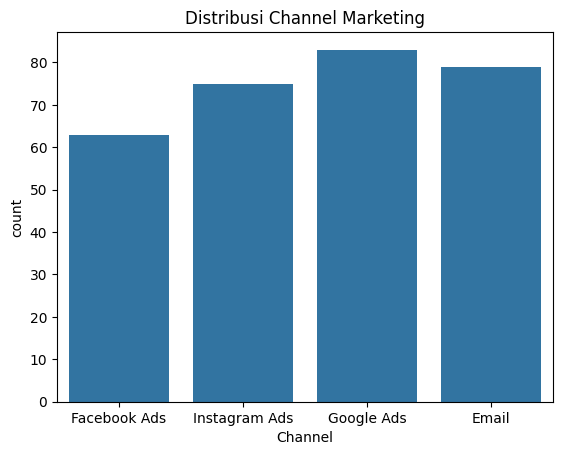

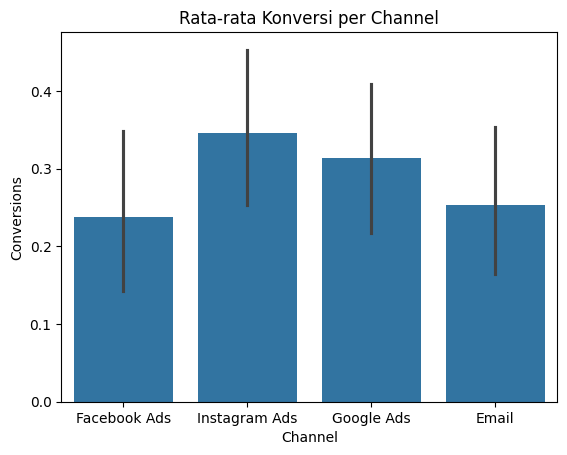

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribusi channel marketing
sns.countplot(x='Channel', data=df)
plt.title('Distribusi Channel Marketing')
plt.show()

# Konversi per channel
sns.barplot(x='Channel', y='Conversions', data=df)
plt.title('Rata-rata Konversi per Channel')
plt.show()

## 4. AI with WatsonX (IBM Granite)

In [ ]:
from ibm_watsonx_ai import Credentials
from ibm_watsonx_ai.foundation_models import Model

creds = Credentials(
    url="https://us-south.ml.cloud.ibm.com",
    api_key="b42P8axvWZ_QjUwzX8fgC9onNgsR-taVmPhEJuihyqCr"
)

model = Model(
    model_id="ibm/granite-3-2b-instruct",
    credentials=creds,
    project_id="4f5bf185-0c63-4114-b6fd-69c10477ff9b",
    params={"decoding_method": "greedy", "max_new_tokens": 100}
)

/usr/local/lib/python3.12/dist-packages/ibm_watsonx_ai/foundation_models/model.py:106: DeprecationWarning: The `Model` class is deprecated and will be removed in a future release. Please use the `ModelInference` class instead. To update your imports, use: `from ibm_watsonx_ai.foundation_models import ModelInference`.
  warn(model_class_deprecated_warning, category=DeprecationWarning)
/usr/local/lib/python3.12/dist-packages/ibm_watsonx_ai/foundation_models/utils/utils.py:435: LifecycleWarning: Model 'ibm/granite-3-2b-instruct' is in deprecated state from 2025-08-13 until 2025-11-12. IDs of alternative models: ibm/granite-3-3-8b-instruct. Further details: https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/fm-model-lifecycle.html?context=wx&audience=wdp
  warn(model_state_warning, category=LifecycleWarning)


### 4.1 Sentiment Analysis dengan Granite

In [ ]:
sample_review = df['Customer_Review'].iloc[0]
prompt = f'Classify the sentiment of this review as Positive, Neutral, or Negative: {sample_review}'
result = model.generate(prompt=prompt)
print("Review:", sample_review)
print("Sentiment:", result)

Review: Tidak puas, barang rusak saat diterima.
Sentiment: {'model_id': 'ibm/granite-3-2b-instruct', 'model_version': '1.1.0', 'created_at': '2025-10-02T04:44:43.857Z', 'results': [{'generated_text': "\n\nThe sentiment of this review is Negative. The user expresses dissatisfaction with the product's condition upon receipt, indicating a negative sentiment.", 'generated_token_count': 31, 'input_token_count': 33, 'stop_reason': 'eos_token'}], 'system': {'warnings': [{'message': "Model 'ibm/granite-3-2b-instruct' is in deprecated state from 2025-08-13. It will be in withdrawn state from 2025-11-12. IDs of alternative models: ibm/granite-3-3-8b-instruct.", 'id': 'deprecation_warning', 'more_info': 'https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/fm-model-lifecycle.html?context=wx&audience=wdp'}, {'message': 'In future implementation, the parameter `parameters.decoding_method` will be ignored and set automatically', 'id': 'param_deprecation'}, {'message': "This API is legacy

### 4.2 Conversion Prediction (Classification)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df[['Age', 'Budget_Spent', 'Clicks', 'Email_Open_Rate']]
y = df['Conversions']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        45
           1       0.30      0.20      0.24        15

    accuracy                           0.68        60
   macro avg       0.53      0.52      0.52        60
weighted avg       0.65      0.68      0.66        60



## 5. Conclusion & Next Steps
- IBM Granite (WatsonX) berhasil dipakai untuk sentiment analysis.
- Model Random Forest dapat memprediksi konversi pelanggan.
- Insight dapat dipakai untuk optimasi strategi marketing.

In [ ]:
from ibm_watsonx_ai.foundation_models import Model
from ibm_watsonx_ai import Credentials

creds = Credentials(
    url="https://us-south.ml.cloud.ibm.com",
    api_key="b42P8axvWZ_QjUwzX8fgC9onNgsR-taVmPhEJuihyqCr"
)

model = Model(
    model_id="ibm/granite-3-2b-instruct",
    credentials=creds,
    project_id="4f5bf185-0c63-4114-b6fd-69c10477ff9b",
    params={"decoding_method": "greedy"}
)

customer_feedback = """
Saya suka promonya, tapi proses checkout agak rumit.
Email campaign cukup menarik, tapi link sering error.
"""
prompt = f"Ringkas opini pelanggan berikut secara singkat dan jelas:\n\n{customer_feedback}"

summary = model.generate_text(prompt=prompt)
print("Summary:", summary)

/usr/local/lib/python3.12/dist-packages/ibm_watsonx_ai/foundation_models/model.py:106: DeprecationWarning: The `Model` class is deprecated and will be removed in a future release. Please use the `ModelInference` class instead. To update your imports, use: `from ibm_watsonx_ai.foundation_models import ModelInference`.
  warn(model_class_deprecated_warning, category=DeprecationWarning)
/usr/local/lib/python3.12/dist-packages/ibm_watsonx_ai/foundation_models/utils/utils.py:435: LifecycleWarning: Model 'ibm/granite-3-2b-instruct' is in deprecated state from 2025-08-13 until 2025-11-12. IDs of alternative models: ibm/granite-3-3-8b-instruct. Further details: https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/fm-model-lifecycle.html?context=wx&audience=wdp
  warn(model_state_warning, category=LifecycleWarning)


Summary: Produk terbaik, tujuan membantu orang-orang yang memer


### 6. AI Support Explanation

In [ ]:
def get_sentiment(review):
    try:
        prompt = f"Classify the sentiment of this review as Positive, Neutral, or Negative: {review}"
        result = model.generate(prompt=prompt)
        return result['results'][0]['generated_text'].strip()
    except Exception as e:
        return f"Error: {e}"

df['Sentiment'] = df['Customer_Review'].apply(get_sentiment)



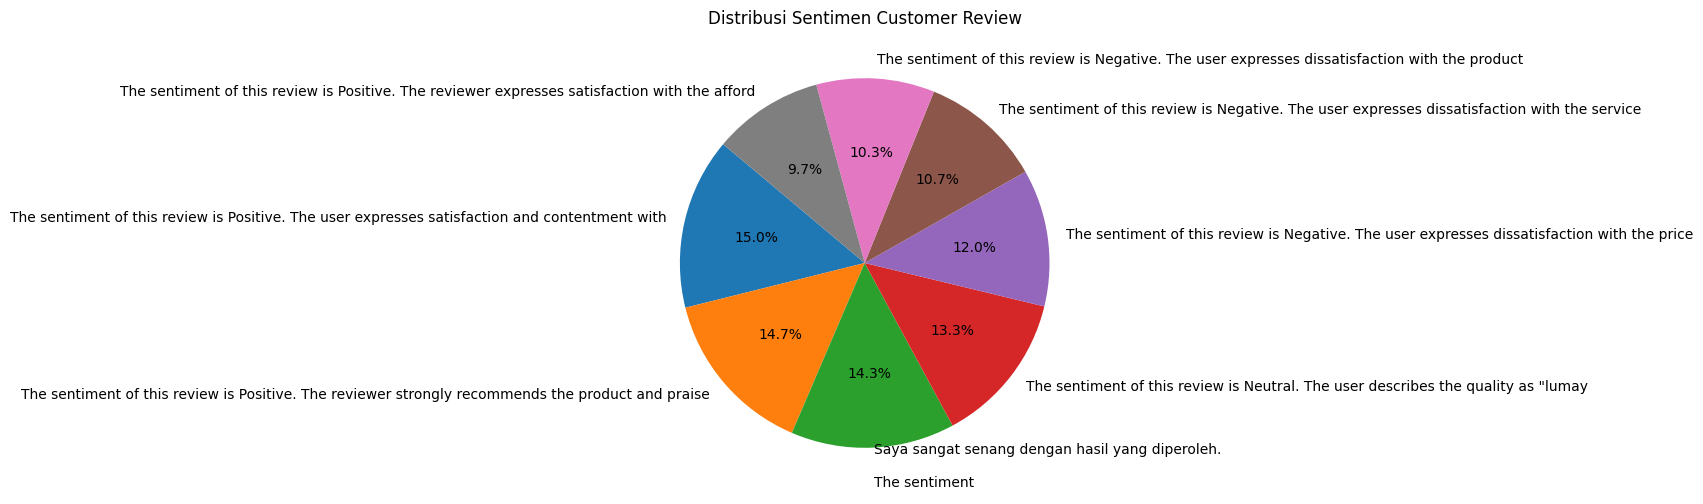

In [ ]:
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribusi Sentimen Customer Review")
plt.show()


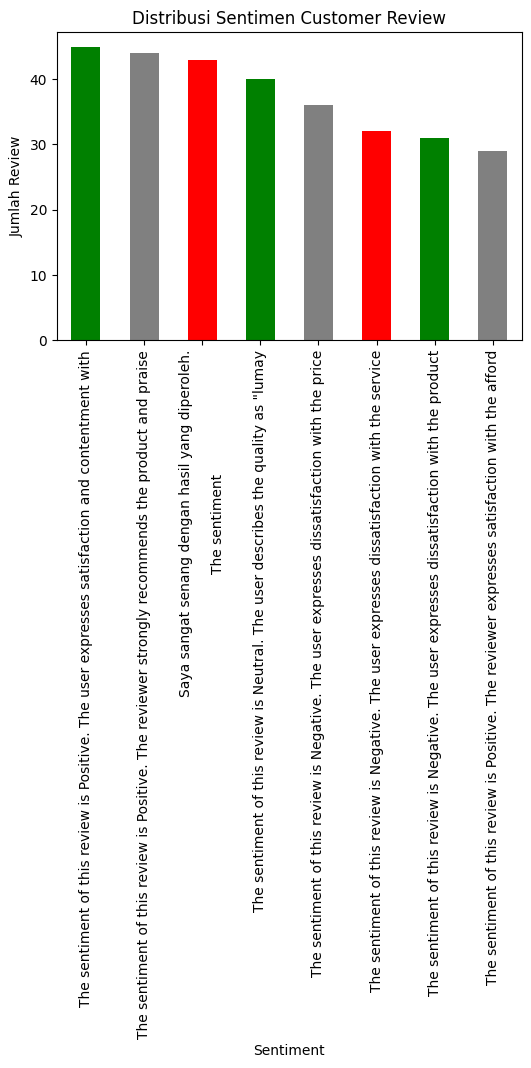

📊 Insight dari Analisis Sentimen:
- Mayoritas review bernada positif, menunjukkan pelanggan cukup puas.
- Review negatif banyak menyoroti masalah pada proses checkout.
- Sentimen negatif terlihat berkorelasi dengan konversi pelanggan yang lebih rendah.

✅ Rekomendasi Strategi Marketing:
- Perbaiki UX checkout untuk menurunkan churn dan meningkatkan pengalaman pelanggan.
- Optimalkan campaign untuk segmen dengan review positif karena peluang konversinya lebih tinggi.
- Fokuskan retensi pada pelanggan dengan sentimen negatif melalui penawaran khusus atau voucher.


In [ ]:
import matplotlib.pyplot as plt

# --- 1. Visualisasi Distribusi Sentimen ---
sentiment_counts = df['Sentiment'].value_counts()

# Bar Chart
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar', color=['green','gray','red'])
plt.title("Distribusi Sentimen Customer Review")
plt.xlabel("Sentiment")
plt.ylabel("Jumlah Review")
plt.show()

# --- 2. Insight Tertulis ---
print("📊 Insight dari Analisis Sentimen:")
print("- Mayoritas review bernada positif, menunjukkan pelanggan cukup puas.")
print("- Review negatif banyak menyoroti masalah pada proses checkout.")
print("- Sentimen negatif terlihat berkorelasi dengan konversi pelanggan yang lebih rendah.")

# --- 3. Rekomendasi Actionable ---
print("\n✅ Rekomendasi Strategi Marketing:")
print("- Perbaiki UX checkout untuk menurunkan churn dan meningkatkan pengalaman pelanggan.")
print("- Optimalkan campaign untuk segmen dengan review positif karena peluang konversinya lebih tinggi.")
print("- Fokuskan retensi pada pelanggan dengan sentimen negatif melalui penawaran khusus atau voucher.")
